# Two Axion System

In [1]:
import matplotlib.pyplot as plt, numpy as np
from scipy.integrate import solve_ivp

$$
V = \sum_i \Lambda_i \left( 1 - \cos(Q_{i,j} \theta_j) \right)
$$

$$
\frac{ \partial V } { \partial \theta_k } = \sum_i \Lambda_i Q_{i,k} \sin(Q_{i,j} \theta_j)
$$

$$
\ddot{\theta}_k + 3 H \dot{\theta}_k + \frac{ \partial V } { \partial \theta_k } = 0
$$

In [30]:
def rhs(t, y, Q, Lambda):
    H = 1 / (2*t)
    N = y.size // 2
    thetas, theta_dots = y[:N], y[N:]
    force = (Lambda * np.sin(Q @ thetas)) @ Q
    theta_dotdots = - 3 * H * theta_dots - force
    return np.hstack([theta_dots, theta_dotdots])

def get_t_interval(H0, tspan):
    start = 1 / (2*H0)
    return start, start + tspan
    
def solve(H0, tspan, thetas0, Q, Lambda):
    init = np.hstack([thetas0, np.zeros(len(Lambda))])
    sol = solve_ivp(rhs, get_t_interval(H0, tspan), init, args=(Q, Lambda), method="LSODA", dense_output=True)
    assert sol.success
    return sol

In [68]:
Q = np.array([[1,1], [1, 0]])
eps = 1e-2
Lambda = np.array([1, 1 + eps])
H0 = 10
thetas0 = [1,1]
tspan = 100

sol = solve(H0, tspan, thetas0, Q, Lambda)
ts = np.linspace(*get_t_interval(H0, tspan), 1000)
theta1, theta2, theta1_dot, theta2_dot = y = sol.sol(ts)
N = len(Lambda)
mass_states = np.vstack([Q @ y[:N, :], Q @ y[N:, :]])

In [69]:
canonical_names = [r"$\theta_1$", r"$\theta_2$", r"$\dot{\theta}_1$", r"$\dot{\theta}_2$"]
mass_states_names = [r"$\phi_1$", r"$\phi_2$", r"$\dot{\phi}_1$", r"$\dot{\phi}_2$"]
tlabel = "t H"

Text(0.5, 0, 't H')

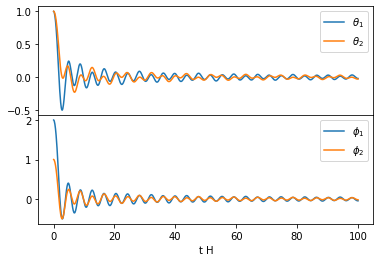

In [70]:
fig = plt.figure()
fig.subplots_adjust(hspace=0)
plt.subplot(2,1,1)
plt.plot(ts, y[0], label=canonical_names[0])
plt.plot(ts, y[1], label=canonical_names[1])
plt.legend()
plt.xlabel(tlabel)
plt.subplot(2,1,2)
plt.plot(ts, mass_states[0], label=mass_states_names[0])
plt.plot(ts, mass_states[1], label=mass_states_names[1])
plt.legend()
plt.xlabel(tlabel)

In [60]:
def plot_vs(allvals, names):
    for i, (vals1, name1) in enumerate(zip(allvals, names)):
        for j, (vals2, name2) in enumerate(zip(allvals, names)):
            if i <= j: continue
            plt.figure()
            plt.plot(vals1, vals2)
            plt.plot([vals1[0]], [vals2[0]], "ro")
            plt.xlabel(name1)
            plt.ylabel(name2)

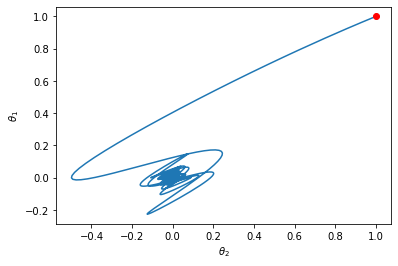

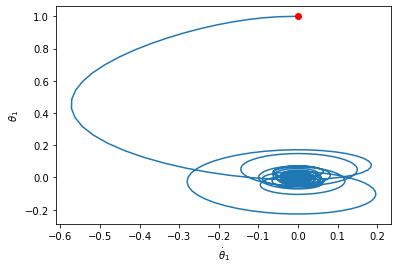

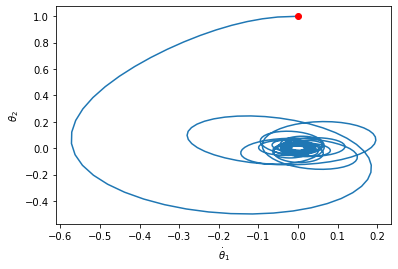

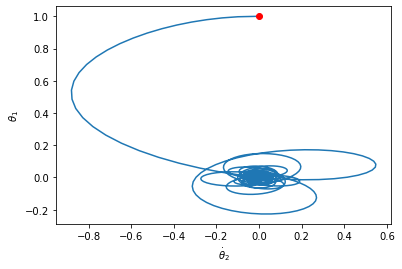

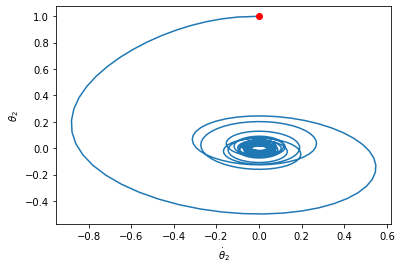

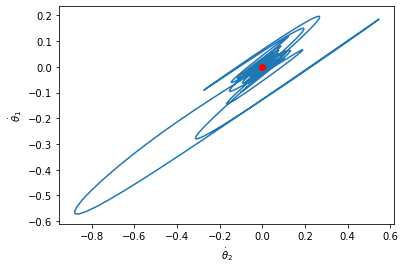

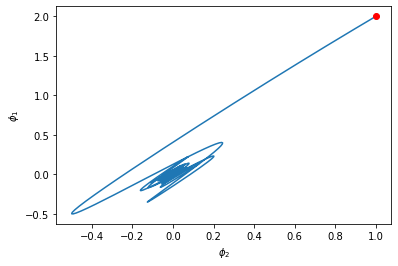

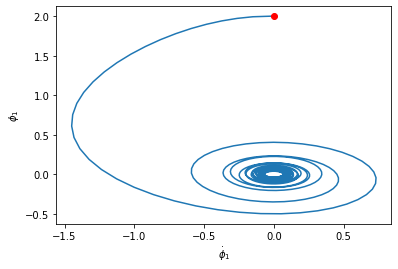

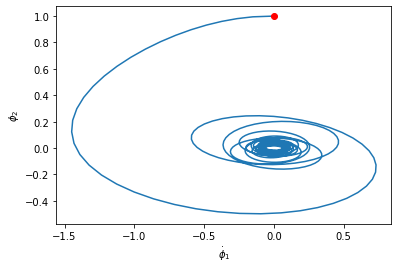

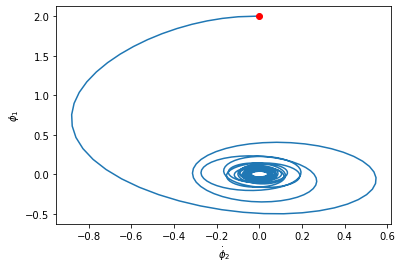

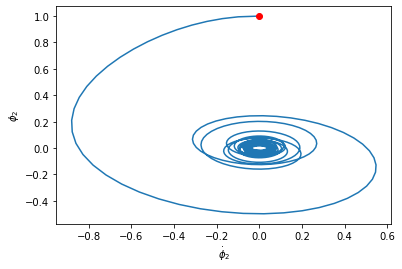

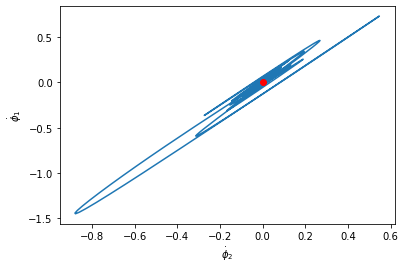

In [67]:
plot_vs(y, canonical_names)
plot_vs(mass_states, mass_states_names)